In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PowerTransformer
from imblearn.over_sampling import SMOTE
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
df = pd.read_csv('/content/drive/My Drive/PGPDSE/Capstone/CSV Files/Diabetes_Preprocessed.csv')
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,preceding_year_visits,number_diab_meds,number_changes,insulin_treatment
0,Caucasian,0,5,Not Available,Not Available,Referral,1,41,0,1,0,0,0,Diabetes,Not Required,Not Required,1,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,no_med
1,Caucasian,0,15,Emergency,Discharged to home,Emergency,3,59,0,18,0,0,0,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,0,0,1,1,insulin_only
2,AfricanAmerican,0,25,Emergency,Discharged to home,Emergency,2,11,5,13,2,0,1,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,1,0,3,1,0,other_meds
3,Caucasian,1,35,Emergency,Discharged to home,Emergency,2,44,1,16,0,0,0,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,0,0,1,1,insulin_only
4,Caucasian,1,45,Emergency,Discharged to home,Emergency,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,1,1,0,0,2,0,insulin_combo


In [22]:
obj = df.select_dtypes('O').columns
le = LabelEncoder()
for i in obj:
    df[i] = le.fit_transform(df[i])

In [23]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,preceding_year_visits,number_diab_meds,number_changes,insulin_treatment
0,2,0,5,2,3,2,1,41,0,1,0,0,0,3,14,14,1,2,2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,2
1,2,0,15,1,0,0,3,59,0,18,0,0,0,5,3,5,9,2,2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,0,0,1,1,1
2,0,0,25,1,0,0,2,11,5,13,2,0,1,15,3,6,6,2,2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,1,0,3,1,0,3
3,2,1,35,1,0,0,2,44,1,16,0,0,0,8,3,1,7,2,2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,0,0,1,1,1
4,2,1,45,1,0,0,1,51,0,8,0,0,0,12,12,3,5,2,2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,1,1,0,0,2,0,0


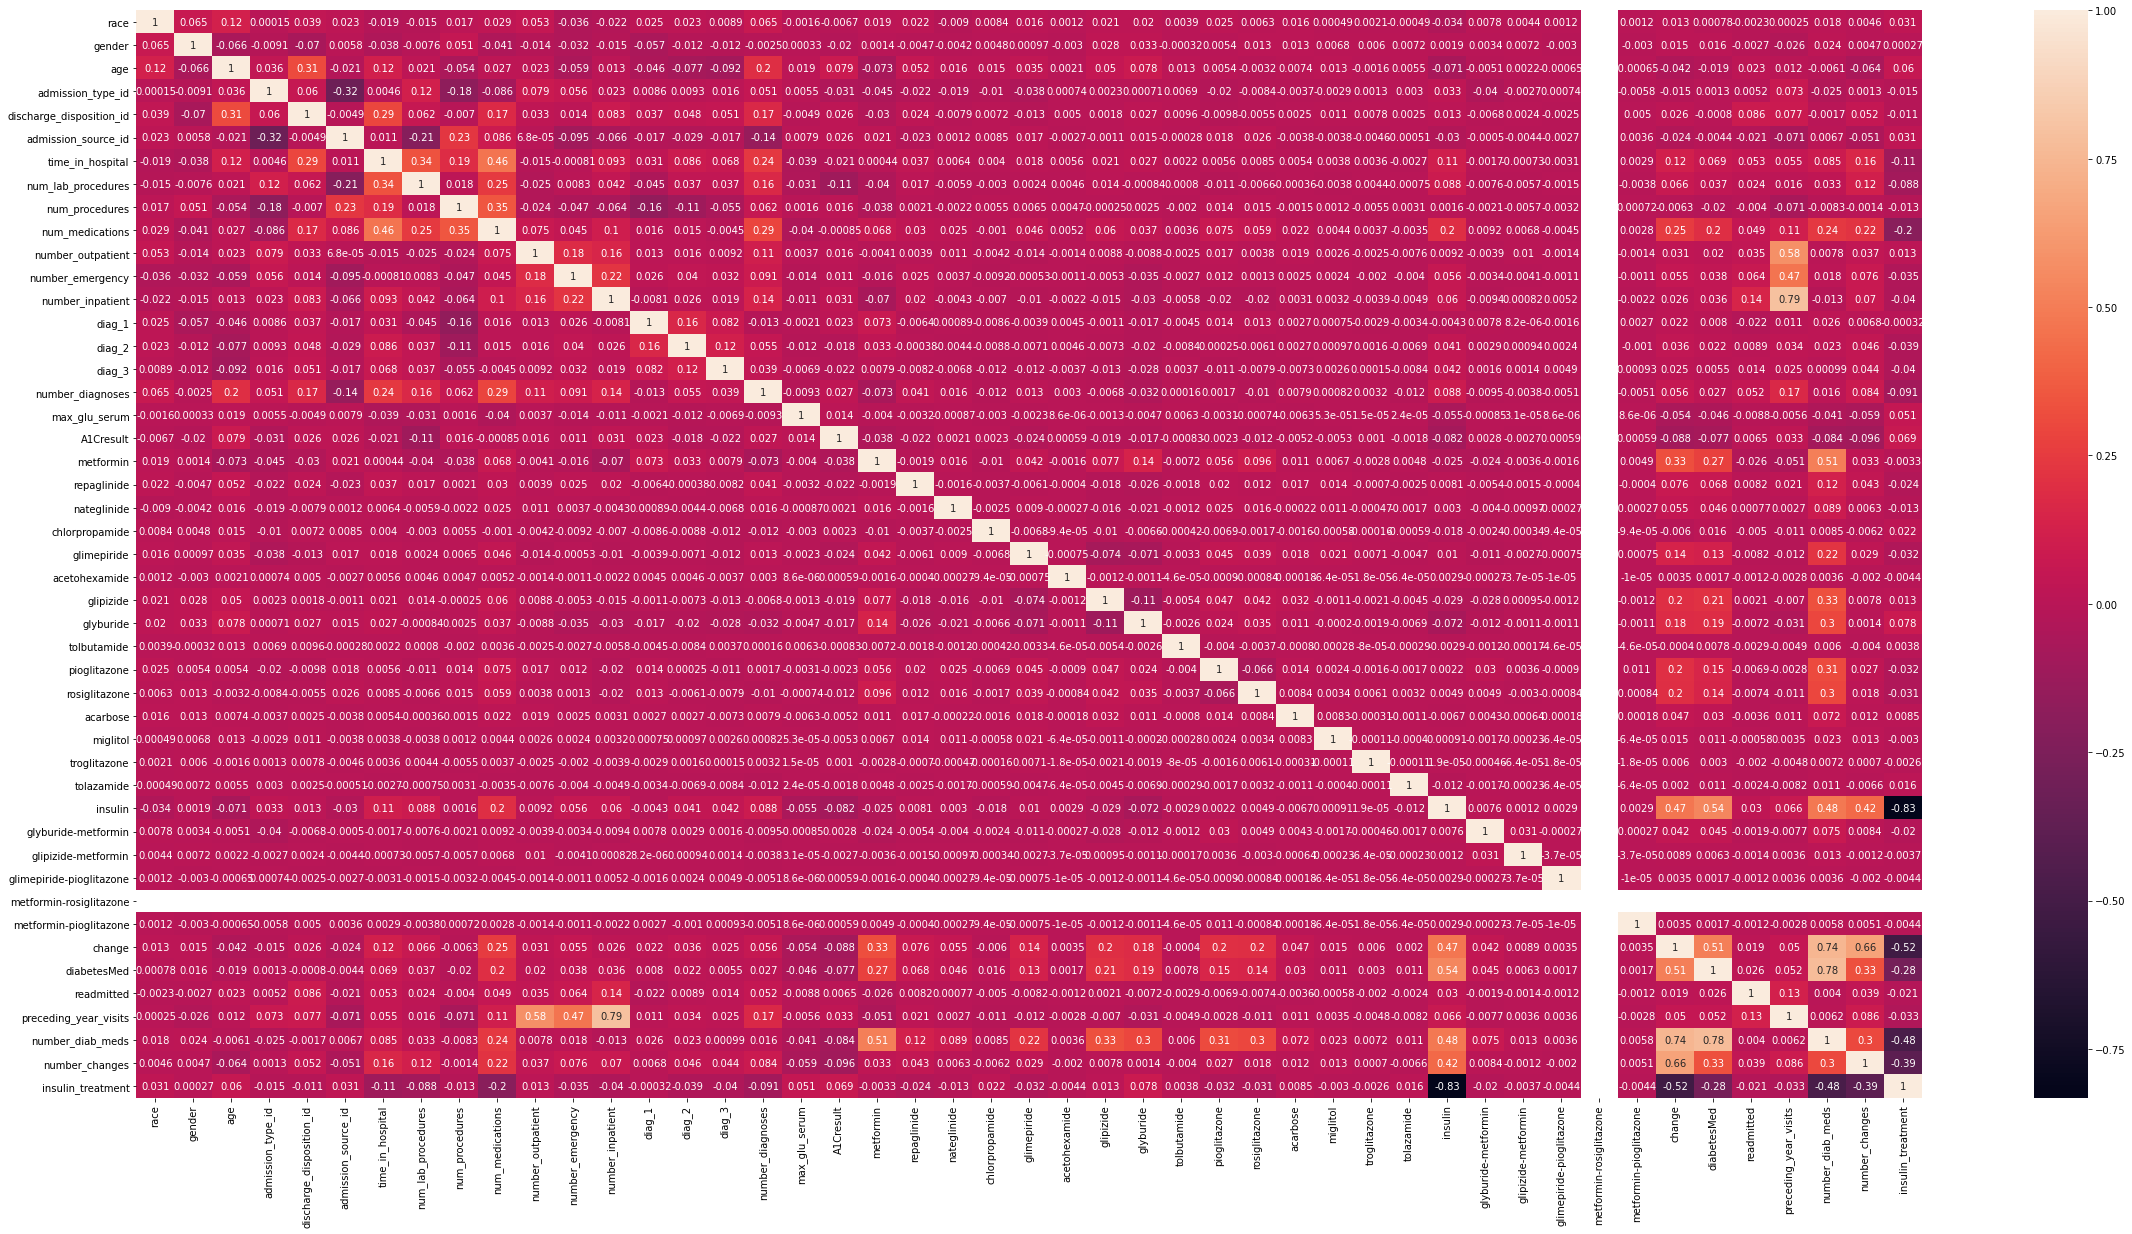

In [25]:
plt.figure(figsize = (40, 20))
sns.heatmap(df.corr(method = 'spearman'), annot = True)
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/My Drive/PGPDSE/Capstone/CSV Files/Diabetes_Preprocessed.csv')
df.head()

In [5]:
X = pd.get_dummies(df.drop('readmitted', 1), drop_first = True)

In [ ]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X.columns)

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [ ]:
vif_df[0:55].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,preceding_year_visits,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity"
vif,1.042648,1.496962,1.627786,1.407344,1.43572,1.871792,inf,inf,inf,1.548649,12.552324,2.095486,1.497814,1.063307,4.438524,1.001121,8.762663,7.630969,1.015864,5.963145,5.360318,1.233187,1.03379,1.003264,1.028169,5.26915,1.498409,1.011844,1.001714,0.0,1.002589,3.441747,inf,inf,68.675005,2.088138,1.032352,1.254135,1.094388,1.068672,2.498163,3.530125,1.187056,1.01386,1.083122,1.005452,1.364684,3.89052,2.067468,1.149508,20.024679,1.727761,8.507463,8.700861,3.309139


In [ ]:
vif_df[55:].T

,diag_1_External causes of injury,diag_1_Genitourinary,diag_1_Infectious and Parasitic,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,2.5834,5.363264,3.283609,6.906358,3.122124,5.436858,3.675209,1.844055,3.251892,4.379648,11.989008,1.248281,3.349898,8.612476,1.171943,5.124053,2.382749,3.683547,1.901675,3.677375,1.661571,1.82844,2.012038,1.640653,1.919361,1.389014,1.320886,1.832215,2.698656,4.361611,1.073131,2.337297,9.312186,1.193183,6.762108,2.504774,4.279962,2.958075,3.422122,1.728703,1.76631,2.276683,1.778811,1.705054,1.58186,1.884688,1.920381,1.980453,3.627766,1.122283,2.085802,1.842023,4.094894,2.74229,2.957218,3.968249,2.204962,4.301827,inf,19.139667


In [ ]:
X1 = X.drop('preceding_year_visits', axis = 1)
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X1.columns)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
vif_df[:57].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury,diag_1_Genitourinary,diag_1_Infectious and Parasitic
vif,1.042648,1.496962,1.627786,1.407344,1.43572,1.871792,1.051804,1.106808,1.1495,1.548649,12.552324,2.095486,1.497814,1.063307,4.438524,1.001121,8.762663,7.630969,1.015864,5.963145,5.360318,1.233187,1.03379,1.003264,1.028169,5.26915,1.498409,1.011844,1.001714,0.0,1.002589,3.441747,inf,68.675005,2.088138,1.032352,1.254135,1.094388,1.068672,2.498163,3.530125,1.187056,1.01386,1.083122,1.005452,1.364684,3.89052,2.067468,1.149508,20.024679,1.727761,8.507463,8.700861,3.309139,2.5834,5.363264,3.283609


In [ ]:
vif_df[57:].T

,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,6.906358,3.122124,5.436858,3.675209,1.844055,3.251892,4.379648,11.989008,1.248281,3.349898,8.612476,1.171943,5.124053,2.382749,3.683547,1.901675,3.677375,1.661571,1.82844,2.012038,1.640653,1.919361,1.389014,1.320886,1.832215,2.698656,4.361611,1.073131,2.337297,9.312186,1.193183,6.762108,2.504774,4.279962,2.958075,3.422122,1.728703,1.76631,2.276683,1.778811,1.705054,1.58186,1.884688,1.920381,1.980453,3.627766,1.122283,2.085802,1.842023,4.094894,2.74229,2.957218,3.968249,2.204962,4.301827,inf,19.139667


In [6]:
X1 = X.drop(['number_emergency', 'number_outpatient', 'number_inpatient'], axis = 1)
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X1.columns)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [7]:
vif_df[:55].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,preceding_year_visits,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury,diag_1_Genitourinary,diag_1_Infectious and Parasitic
vif,1.042448,1.492094,1.624142,1.406991,1.432989,1.870831,1.548561,12.55102,2.095353,1.497743,1.063298,4.438255,1.001118,8.762536,7.630916,1.015849,5.962819,5.360315,1.233134,1.033789,1.003259,1.028161,5.266409,1.498299,1.011834,1.001703,0.0,1.002589,3.441709,inf,1.074173,68.674823,2.088002,1.032325,1.25186,1.09429,1.068387,2.496153,3.515796,1.186115,1.013342,1.081762,1.005409,1.364236,3.88855,2.062528,1.149496,20.018223,1.727373,8.505453,8.69788,3.30789,2.582218,5.360413,3.282897


In [8]:
vif_df[55:].T

,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,6.905109,3.121294,5.432131,3.672769,1.843473,3.250658,4.378016,11.984257,1.247855,3.347926,8.610397,1.171849,5.123129,2.382317,3.682906,1.901656,3.677029,1.661045,1.82837,2.010559,1.640637,1.918829,1.388699,1.320881,1.832079,2.698446,4.360514,1.073124,2.33728,9.311699,1.193129,6.761822,2.504432,4.279918,2.957996,3.421919,1.7285,1.766258,2.276041,1.778769,1.70488,1.581819,1.88457,1.92037,1.980392,3.627592,1.122281,2.085637,1.841636,4.094267,2.742281,2.957218,3.965646,2.204819,4.301398,inf,19.134946


In [ ]:
X1 = X.drop(['preceding_year_visits', 'diabetesMed'], axis = 1)
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X1.columns)

In [ ]:
vif_df[:55].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury,diag_1_Genitourinary
vif,1.042648,1.496962,1.627786,1.407344,1.43572,1.871792,1.051804,1.106808,1.1495,1.548649,12.552324,2.095486,1.497814,1.063307,4.438524,1.001121,8.762663,7.630969,1.015864,5.963145,5.360318,1.233187,1.03379,1.003264,1.028169,5.26915,1.498409,1.011844,1.001714,372892.137729,1.002589,3.441747,68.675005,2.088138,1.032352,1.254135,1.094388,1.068672,2.498163,3.530125,1.187056,1.01386,1.083122,1.005452,1.364684,3.89052,2.067468,1.149508,20.024679,1.727761,8.507463,8.700861,3.309139,2.5834,5.363264


In [ ]:
vif_df[55:].T

,diag_1_Infectious and Parasitic,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,3.283609,6.906358,3.122124,5.436858,3.675209,1.844055,3.251892,4.379648,11.989008,1.248281,3.349898,8.612476,1.171943,5.124053,2.382749,3.683547,1.901675,3.677375,1.661571,1.82844,2.012038,1.640653,1.919361,1.389014,1.320886,1.832215,2.698656,4.361611,1.073131,2.337297,9.312186,1.193183,6.762108,2.504774,4.279962,2.958075,3.422122,1.728703,1.76631,2.276683,1.778811,1.705054,1.58186,1.884688,1.920381,1.980453,3.627766,1.122283,2.085802,1.842023,4.094894,2.74229,2.957218,3.968249,2.204962,4.301827,24.146167,19.139667


In [ ]:
X1 = X.drop(['preceding_year_visits', 'diabetesMed', 'metformin-rosiglitazone'], axis = 1)
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X1.columns)

In [ ]:
vif_df[:55].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury,diag_1_Genitourinary,diag_1_Infectious and Parasitic
vif,1.934403,26.926848,5.169341,8.124125,2.320658,9.184533,1.142006,1.157114,1.440441,24.345361,55.837329,120.844117,200.738817,1133.60753,77.373234,71146.665575,61.845547,63.682067,4823.653024,74.159923,77.107672,378.870488,2683.573189,29385.373426,2440.880827,9.185576,208.578936,7342.166584,71179.883862,70794.059795,6.414783,168.390727,2.809103,1.039064,5.323163,1.117549,1.085116,9.159084,3.854547,1.367312,1.020266,1.137509,1.006496,1.722492,4.131372,2.979435,1.221259,28.548518,1.741726,9.317452,9.6038,3.397821,2.626015,5.647815,3.369264


In [ ]:
vif_df[55:].T

,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,7.416184,3.193056,5.717161,3.78725,1.861075,3.336197,4.409716,13.942067,1.251487,3.439037,12.550226,1.177709,5.872965,2.484837,4.009493,1.951446,4.007487,1.692797,1.872692,2.066641,1.670023,1.964719,1.404035,1.325431,1.876907,2.709973,4.871153,1.074851,2.424637,13.267364,1.198929,8.149752,2.606141,4.701941,3.116326,3.658773,1.760804,1.800469,2.349782,1.813262,1.733144,1.604953,1.911123,1.966189,1.986596,3.902739,1.125216,2.140749,1.864488,78.04621,2.815059,3.218195,23.473664,2.320511,6.145046,29.905812,23.791044


In [ ]:
X1 = X.drop(['preceding_year_visits', 'diabetesMed', 'metformin-rosiglitazone', 'glimepiride-pioglitazone'], axis = 1)
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X1.columns)

In [ ]:
vif_df[:55].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury,diag_1_Genitourinary,diag_1_Infectious and Parasitic,diag_1_Injury and Poisoning
vif,1.934367,26.926821,5.169112,8.124114,2.320658,9.184523,1.142005,1.157112,1.4404,24.344301,54.768325,119.436526,199.077133,1128.742204,76.114984,61668.125076,60.686401,62.504868,4787.89744,72.887884,75.79189,376.666286,2668.509298,28277.14424,2428.496464,9.185572,206.944132,7268.768775,61161.33967,6.412795,164.965584,2.806839,1.039064,5.323161,1.117548,1.085116,9.15894,3.854547,1.367304,1.020262,1.137487,1.006496,1.72243,4.131336,2.979397,1.221254,28.545732,1.741653,9.317134,9.602826,3.397585,2.625869,5.647363,3.369052,7.415467


In [ ]:
vif_df[55:].T

,diag_1_Mental Disorders,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,3.192881,5.716363,3.786989,1.86099,3.335953,4.409643,13.940577,1.251464,3.438792,12.549658,1.177696,5.872657,2.484767,4.009347,1.951377,4.00739,1.692573,1.872648,2.06659,1.66999,1.96467,1.403978,1.325418,1.87688,2.709966,4.870895,1.074847,2.424588,13.266704,1.198918,8.149325,2.606068,4.701617,3.11619,3.658659,1.760773,1.800426,2.349704,1.813242,1.733123,1.604939,1.911046,1.966148,1.986589,3.902734,1.125209,2.140701,1.864423,78.04147,2.814965,3.218051,23.47289,2.320486,6.144454,29.530929,23.434659


In [ ]:
X1 = X.drop(['preceding_year_visits', 'diabetesMed', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'acetohexamide'], axis = 1)
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X1.columns)

In [ ]:
vif_df[:55].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury,diag_1_Genitourinary,diag_1_Infectious and Parasitic,diag_1_Injury and Poisoning,diag_1_Mental Disorders
vif,1.934314,26.925535,5.169105,8.124111,2.320589,9.18436,1.142004,1.157112,1.440399,24.344159,52.469354,116.424485,195.506688,1118.323502,73.416709,58.200431,59.981156,4710.836159,70.15659,72.96897,371.942226,2636.040939,25895.693245,2401.915162,9.18557,203.429598,7110.887453,40462.4193,6.408292,157.603786,2.801536,1.039064,5.323152,1.117547,1.085116,9.158664,3.854547,1.367294,1.02026,1.13745,1.006494,1.722429,4.131243,2.979339,1.221237,28.538642,1.74149,9.315297,9.600582,3.397089,2.625475,5.646385,3.368511,7.413751,3.192429


In [ ]:
vif_df[55:].T

,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,5.714399,3.786296,1.860775,3.335421,4.409463,13.938285,1.251415,3.438263,12.548637,1.177675,5.872084,2.484637,4.009159,1.95127,4.007204,1.692513,1.872532,2.066505,1.669937,1.964594,1.403866,1.325404,1.876834,2.709951,4.870766,1.074843,2.42452,13.265879,1.198901,8.148586,2.605947,4.701041,3.116011,3.65841,1.760715,1.800359,2.34957,1.813211,1.733071,1.604919,1.910998,1.966062,1.986576,3.902328,1.125201,2.140624,1.864283,78.030945,2.814788,3.21784,23.471692,2.320436,6.143413,28.72806,22.671813


In [ ]:
X1 = X.drop(['preceding_year_visits', 'diabetesMed', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'acetohexamide',
             'metformin-pioglitazone'], axis = 1)
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X1.columns)

In [ ]:
vif_df[:50].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury
vif,1.934112,26.921296,5.168992,8.123947,2.320584,9.184226,1.141996,1.157111,1.44037,24.341769,44.694666,106.232636,183.355014,1080.664693,64.317915,49.789868,51.450581,4421.217029,60.577602,63.477285,355.782474,2517.662717,16779.364494,2303.724224,9.18555,191.491921,6514.432165,6.402396,133.617578,2.791263,1.039064,5.3231,1.11754,1.085116,9.156695,3.854504,1.367274,1.020248,1.137332,1.006488,1.722429,4.131008,2.979258,1.221215,28.512921,1.740844,9.307775,9.592082,3.395057,2.623931


In [ ]:
vif_df[50:].T

,diag_1_Genitourinary,diag_1_Infectious and Parasitic,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,5.642468,3.366485,7.407394,3.19056,5.710027,3.783695,1.859933,3.333313,4.408599,13.927083,1.251218,3.436069,12.545628,1.177604,5.870925,2.484242,4.008529,1.950882,4.006636,1.692333,1.872129,2.066226,1.669679,1.964343,1.403462,1.325364,1.876703,2.709924,4.869775,1.074828,2.424316,13.261424,1.198839,8.145392,2.605496,4.700024,3.115197,3.657496,1.760519,1.800119,2.349049,1.813034,1.732898,1.604812,1.910644,1.965739,1.986526,3.900989,1.12516,2.140338,1.863758,77.990034,2.814061,3.216886,23.466089,2.320253,6.142736,26.188266,20.150241


In [ ]:
X1 = X.drop(['preceding_year_visits', 'diabetesMed', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'acetohexamide',
             'metformin-pioglitazone', 'troglitazone'], axis = 1)
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X1.columns)

In [ ]:
vif_df[:50].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury,diag_1_Genitourinary
vif,1.934101,26.905184,5.168895,8.123945,2.320472,9.184008,1.141991,1.15711,1.440369,24.341229,33.880919,91.841912,166.045527,1024.442946,51.206802,38.018413,39.510507,3970.224361,47.384149,49.876199,332.453115,2335.748138,2153.145918,9.185443,174.552853,5576.779297,6.388413,99.528455,2.77282,1.039064,5.323092,1.11753,1.085116,9.154873,3.854492,1.367244,1.020225,1.137331,1.006477,1.722407,4.130535,2.97894,1.221145,28.475293,1.739824,9.295668,9.578702,3.391829,2.621557,5.636216


In [ ]:
vif_df[50:].T

,diag_1_Infectious and Parasitic,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,3.363053,7.396817,3.187593,5.703513,3.779853,1.858527,3.329787,4.407407,13.908685,1.250912,3.432534,12.540698,1.177484,5.86845,2.483581,4.007404,1.950255,4.005622,1.692019,1.872058,2.065714,1.669279,1.96392,1.403459,1.325292,1.876436,2.709863,4.86786,1.074801,2.42395,13.255298,1.198738,8.141357,2.604768,4.697733,3.113925,3.655994,1.760187,1.799682,2.348177,1.812756,1.732622,1.604625,1.91022,1.965162,1.986453,3.899608,1.125098,2.13988,1.862945,77.92536,2.812884,3.215465,23.459698,2.319965,6.140664,22.502024,16.547383


In [ ]:
X1 = X.drop(['preceding_year_visits', 'diabetesMed', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'acetohexamide',
             'metformin-pioglitazone', 'troglitazone', 'glipizide-metformin'], axis = 1)
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X1.columns)

In [ ]:
vif_df[:50].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,change,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury,diag_1_Genitourinary,diag_1_Infectious and Parasitic
vif,1.934097,26.897165,5.168842,8.122703,2.320267,9.183005,1.141974,1.157095,1.440367,24.336235,29.081291,85.25513,157.843616,991.291875,45.41462,32.695462,34.129314,3664.28838,41.413799,43.889313,320.764517,2219.152472,2056.269329,9.185395,163.957611,6.381171,84.287615,2.762944,1.039063,5.323077,1.11752,1.085114,9.153488,3.854447,1.367157,1.020148,1.137281,1.00647,1.722405,4.13023,2.978514,1.221041,28.449352,1.739088,9.286817,9.569749,3.389486,2.62029,5.631879,3.360643


In [ ]:
vif_df[50:].T

,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,7.389852,3.185274,5.697483,3.777005,1.858082,3.327821,4.40655,13.896161,1.250679,3.429851,12.537211,1.177407,5.866533,2.483287,4.006536,1.950231,4.004828,1.691762,1.871945,2.065527,1.668967,1.96358,1.403297,1.325239,1.876208,2.709827,4.866769,1.074781,2.423624,13.251005,1.19866,8.13849,2.604247,4.696369,3.113539,3.655004,1.759955,1.799574,2.347551,1.812554,1.732422,1.604484,1.909815,1.964757,1.986412,3.89876,1.125052,2.139574,1.862385,77.885556,2.811935,3.213499,23.445783,2.319237,6.139552,20.845058,14.918287


In [ ]:
X1 = X.drop(['preceding_year_visits', 'diabetesMed', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'acetohexamide',
             'metformin-pioglitazone', 'troglitazone', 'glipizide-metformin', 'tolbutamide'], axis = 1)
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X1.columns)

In [ ]:
vif_df[:50].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,change,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury,diag_1_Genitourinary,diag_1_Infectious and Parasitic,diag_1_Injury and Poisoning
vif,1.934058,26.891779,5.168773,8.122665,2.320158,9.182682,1.14197,1.157095,1.44035,24.333266,24.163965,78.450408,149.117016,952.333709,39.51098,27.362393,28.656228,35.337615,37.693896,307.619136,2073.778125,1936.273149,9.185387,154.914112,6.374951,68.044162,2.753165,1.039062,5.323075,1.117504,1.085111,9.152071,3.854356,1.367062,1.020148,1.137154,1.006464,1.722387,4.129307,2.978172,1.220993,28.417924,1.738176,9.277244,9.557966,3.38648,2.618216,5.626081,3.358094,7.383281


In [ ]:
vif_df[50:].T

,diag_1_Mental Disorders,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,3.182535,5.691293,3.773445,1.857023,3.324696,4.405639,13.879859,1.250394,3.426625,12.532499,1.177282,5.863946,2.48254,4.004938,1.949861,4.003428,1.691334,1.871688,2.064985,1.668703,1.963038,1.40322,1.325152,1.875803,2.709764,4.864332,1.074749,2.422996,13.245808,1.198575,8.135093,2.603641,4.694891,3.112658,3.654438,1.759669,1.799197,2.346875,1.812236,1.732186,1.60429,1.909365,1.964272,1.986355,3.898206,1.125001,2.139131,1.861298,77.80024,2.81103,3.212694,23.439325,2.318837,6.132331,18.974793,13.218557


In [ ]:
X1 = X.drop(['preceding_year_visits', 'diabetesMed', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'acetohexamide',
             'metformin-pioglitazone', 'troglitazone', 'glipizide-metformin', 'tolbutamide', 'miglitol'], axis = 1)
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X1.columns)

In [ ]:
vif_df[:50].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,tolazamide,insulin,glyburide-metformin,change,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury,diag_1_Genitourinary,diag_1_Infectious and Parasitic,diag_1_Injury and Poisoning,diag_1_Mental Disorders
vif,1.934054,26.886982,5.168566,8.121701,2.320115,9.18265,1.141967,1.157091,1.440344,24.32791,20.624592,72.791451,141.492703,912.324217,34.778828,23.422321,24.657501,30.992474,33.273496,295.782554,1803.197785,9.185363,147.744806,6.374753,57.52137,2.751311,1.039049,5.322877,1.117446,1.085079,9.150208,3.85432,1.366982,1.020147,1.137129,1.006459,1.722204,4.128827,2.977423,1.220941,28.380727,1.737099,9.263715,9.545836,3.382996,2.615788,5.619954,3.355049,7.374684,3.180302


In [ ]:
vif_df[50:].T

,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,5.684199,3.769758,1.855723,3.321572,4.404621,13.861,1.25006,3.422951,12.522697,1.177059,5.858546,2.481257,4.001998,1.948853,4.000854,1.690942,1.87105,2.064076,1.668447,1.96205,1.402992,1.325119,1.874971,2.709629,4.861196,1.074688,2.422052,13.237495,1.198422,8.130848,2.602587,4.692585,3.111591,3.652689,1.759336,1.798788,2.345718,1.811839,1.731742,1.60395,1.9086,1.963426,1.986287,3.896776,1.124923,2.138869,1.860327,77.729781,2.809486,3.211866,23.430464,2.318272,6.13233,17.871423,12.062516


In [ ]:
X1 = X.drop(['preceding_year_visits', 'diabetesMed', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'acetohexamide',
             'metformin-pioglitazone', 'troglitazone', 'glipizide-metformin', 'tolbutamide', 'miglitol', 'tolazamide'], axis = 1)
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X1.columns)

In [ ]:
vif_df[:50].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury,diag_1_Genitourinary,diag_1_Infectious and Parasitic,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Musculoskeletal System and Connective Tissue
vif,1.934042,26.875917,5.168481,8.121585,2.32009,9.18265,1.14196,1.157087,1.440344,24.31394,14.884463,64.538355,130.389662,850.959576,27.898763,17.316022,18.523223,23.977788,26.034805,278.01618,9.185354,136.425798,6.368284,39.304623,2.74164,1.039032,5.322785,1.117351,1.085043,9.147944,3.854296,1.36698,1.020144,1.136992,1.006449,1.722177,4.127646,2.976457,1.220848,28.326273,1.735422,9.244648,9.525521,3.377625,2.612029,5.60993,3.350033,7.360526,3.175276,5.674334


In [ ]:
vif_df[50:].T

,diag_1_Neoplasms,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,3.763894,1.853753,3.317386,4.402921,13.833547,1.249522,3.41708,12.515089,1.17685,5.854303,2.480221,3.999381,1.948342,3.998505,1.690353,1.87059,2.063366,1.668011,1.961344,1.402649,1.324917,1.874222,2.709554,4.858361,1.074628,2.421131,13.223848,1.198126,8.119827,2.600468,4.687671,3.108801,3.649784,1.75847,1.798057,2.343523,1.811088,1.730864,1.603243,1.907806,1.962149,1.98613,3.893481,1.124758,2.137738,1.858494,77.589333,2.806727,3.208923,23.407578,2.316904,6.128398,15.831429,10.195949


In [ ]:
X1 = X.drop(['preceding_year_visits', 'diabetesMed', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'acetohexamide',
             'metformin-pioglitazone', 'troglitazone', 'glipizide-metformin', 'tolbutamide', 'miglitol', 'tolazamide',
             'chlorpropamide'], axis = 1)
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_df = pd.DataFrame({'vif' : vif}, index = X1.columns)

In [ ]:
vif_df[:50].T

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,number_diab_meds,number_changes,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home with home health service,discharge_disposition_id_Left AMA,discharge_disposition_id_Not Available,discharge_disposition_id_Still patient/referred to this institution,discharge_disposition_id_Transferred to another medical facility,admission_source_id_Not Available,admission_source_id_Referral,admission_source_id_Transferred from another health care facility,diag_1_Circulatory,diag_1_Congenital Anomalies,diag_1_Diabetes,diag_1_Digestive,"diag_1_Endocrine, Nutritional, Metabolic, Immunity",diag_1_External causes of injury,diag_1_Genitourinary,diag_1_Infectious and Parasitic,diag_1_Injury and Poisoning,diag_1_Mental Disorders,diag_1_Musculoskeletal System and Connective Tissue,diag_1_Neoplasms
vif,1.934042,26.86685,5.168477,8.12139,2.320068,9.18265,1.141954,1.157084,1.44032,24.291714,11.372402,59.023459,122.199131,23.556083,13.544762,14.674831,19.533262,21.351015,263.033821,9.185353,128.238748,6.366491,27.128416,2.737161,1.039011,5.322772,1.117342,1.085031,9.141655,3.853878,1.36698,1.020142,1.136215,1.006442,1.722155,4.127014,2.975385,1.22082,28.262602,1.733359,9.221406,9.50148,3.371378,2.607835,5.597891,3.34419,7.343776,3.169838,5.661991,3.756486


In [ ]:
vif_df[50:].T

,diag_1_Nervous,diag_1_Other Symptoms,"diag_1_Pregnancy, Childbirth",diag_1_Respiratory,diag_1_Sense Organs,diag_1_Skin and Subcutaneous Tissue,diag_2_Circulatory,diag_2_Congenital Anomalies,diag_2_Diabetes,diag_2_Digestive,"diag_2_Endocrine, Nutritional, Metabolic, Immunity",diag_2_External causes of injury,diag_2_Genitourinary,diag_2_Infectious and Parasitic,diag_2_Injury and Poisoning,diag_2_Mental Disorders,diag_2_Musculoskeletal System and Connective Tissue,diag_2_Neoplasms,diag_2_Nervous,diag_2_Not Required,diag_2_Other Symptoms,"diag_2_Pregnancy, Childbirth",diag_2_Respiratory,diag_2_Sense Organs,diag_2_Skin and Subcutaneous Tissue,diag_3_Circulatory,diag_3_Congenital Anomalies,diag_3_Diabetes,diag_3_Digestive,"diag_3_Endocrine, Nutritional, Metabolic, Immunity",diag_3_External causes of injury,diag_3_Genitourinary,diag_3_Infectious and Parasitic,diag_3_Injury and Poisoning,diag_3_Mental Disorders,diag_3_Musculoskeletal System and Connective Tissue,diag_3_Neoplasms,diag_3_Nervous,diag_3_Not Required,diag_3_Other Symptoms,"diag_3_Pregnancy, Childbirth",diag_3_Respiratory,diag_3_Sense Organs,diag_3_Skin and Subcutaneous Tissue,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
vif,1.851296,3.312206,4.400928,13.799347,1.248854,3.410912,12.507504,1.176606,5.84866,2.478679,3.996994,1.947572,3.996523,1.689649,1.869811,2.062406,1.66773,1.960539,1.402359,1.324706,1.873305,2.70943,4.85514,1.074558,2.420217,13.208756,1.197963,8.109997,2.598466,4.682648,3.105658,3.64647,1.757447,1.79695,2.341563,1.809903,1.730012,1.602424,1.906777,1.960465,1.985976,3.88949,1.124589,2.136504,1.856722,77.401779,2.802897,3.206028,23.384402,2.315681,6.113157,14.295519,8.952062
